In [2]:
import os
os.chdir('C:/Users/sreepa/Downloads')

from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import statsmodels.api as sm 

In [3]:
data = pd.read_csv('Milk Production Data.txt', delim_whitespace=True)

In [4]:
data.columns

Index(['CurrentMilk', 'Previous', 'Fat', 'Protein', 'Days', 'Lactation',
       'I79'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CurrentMilk  199 non-null    int64  
 1   Previous     199 non-null    int64  
 2   Fat          199 non-null    float64
 3   Protein      199 non-null    float64
 4   Days         199 non-null    int64  
 5   Lactation    199 non-null    int64  
 6   I79          199 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 11.0 KB


In [6]:
data.describe()

,CurrentMilk,Previous,Fat,Protein,Days,Lactation,I79
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,64.819095,62.603015,3.723116,3.184774,155.055276,2.236181,0.849246
std,18.129095,16.790696,0.874884,0.546092,68.280482,1.463184,0.358711
min,14.000000,17.000000,1.800000,1.300000,21.000000,1.000000,0.000000
25%,54.000000,53.000000,3.150000,2.900000,105.000000,1.000000,1.000000
50%,64.000000,62.000000,3.600000,3.200000,149.000000,2.000000,1.000000
75%,77.000000,73.000000,4.100000,3.400000,208.500000,3.000000,1.000000
max,113.000000,104.000000,7.400000,8.900000,301.000000,8.000000,1.000000


In [7]:
data.isnull().sum()

CurrentMilk    0
Previous       0
Fat            0
Protein        0
Days           0
Lactation      0
I79            0
dtype: int64

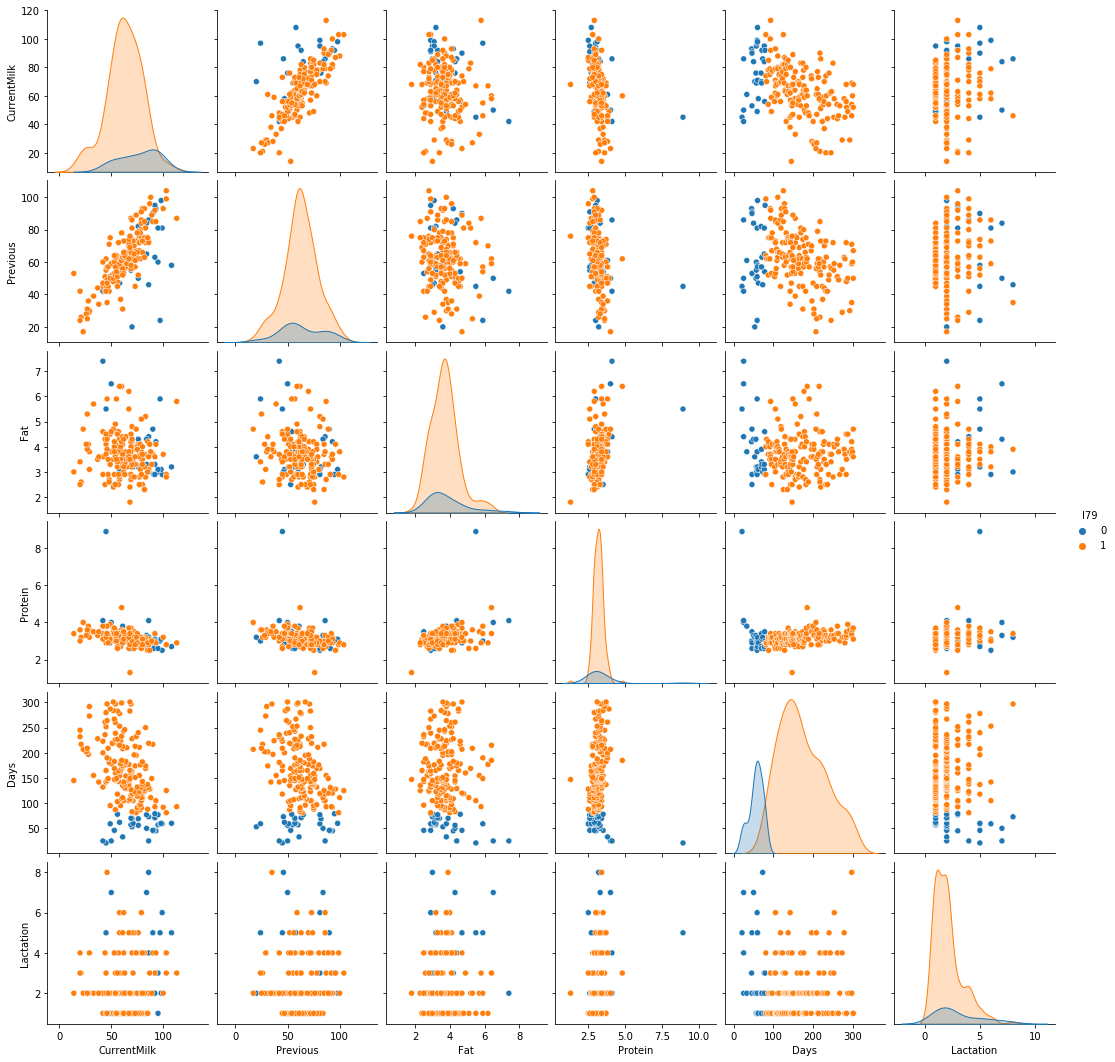

In [8]:
sns.pairplot(data=data,hue='I79')

In [9]:
model = smf.ols('CurrentMilk ~ Previous+Days+Protein+Lactation+Fat+I79', data=data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CurrentMilk   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     63.20
Date:                Thu, 20 May 2021   Prob (F-statistic):           7.43e-43
Time:                        21:17:51   Log-Likelihood:                -749.99
No. Observations:                 199   AIC:                             1514.
Df Residuals:                     192   BIC:                             1537.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.0304      7.303      6.987      0.000      36.626      65.435
Previous       0.6985      0.052     13.423      0.000       0.596       0.801
Days          -0.0317      0.015     -2.045      0.042      -0.062      -0.001
Protein       -6.4156      1.609     -3.987      0.000      -9.590      -3.242
Lactation      0.5268      0.549      0.960      0.338      -0.556       1.609
Fat            0.7979      0.952      0.838      0.403      -1.081       2.676
I79          -10.2976      2.847     -3.617      0.000     -15.913      -4.682
==============================================================================
Omnibus:                       13.458   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               32.532
Skew:                           0.181   Prob(JB):                     8.62e-08
Kurtosis:                       4.948   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model = smf.ols('CurrentMilk ~ Previous+Protein+I79', data=data).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CurrentMilk   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     122.5
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.23e-44
Time:                        21:43:56   Log-Likelihood:                -753.04
No. Observations:                 199   AIC:                             1514.
Df Residuals:                     195   BIC:                             1527.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.9431      6.794      7.204      0.000      35.543      62.343
Previous       0.7421      0.048     15.504      0.000       0.648       0.837
Protein       -5.7402      1.479     -3.882      0.000      -8.657      -2.824
I79          -14.4874      2.144     -6.759      0.000     -18.715     -10.260
==============================================================================
Omnibus:                       21.007   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.037
Skew:                           0.385   Prob(JB):                     4.12e-13
Kurtosis:                       5.507   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
fittedval = model.fittedvalues
print(fittedval)
std_resid = model.get_influence().resid_studentized_internal
print(std_resid)


0      31.251789
1      89.232919
2      63.089623
3      56.578418
4      72.401293
         ...    
194    83.286165
195    66.147121
196    55.014904
197    60.111459
198    63.654073
Length: 199, dtype: float64
[ 2.00078458e+00 -3.10407279e-01 -1.24369210e+00 -1.38903911e+00
 -1.08058871e+00 -7.38300534e-01 -1.00722819e+00 -8.65599590e-01
 -1.43768140e+00 -7.92290025e-01  2.37325954e+00  8.42491155e-01
  1.75939903e+00 -5.55776718e-01  4.08861425e-01  4.57722201e+00
 -2.00822314e+00  2.99376225e+00 -5.62433567e-01 -1.77612731e-01
 -8.72883677e-01 -1.73951567e+00 -1.63555019e-01 -6.96708300e-01
  1.33371468e+00  2.02029008e+00  8.25139699e-02  2.19784334e-01
 -1.22373092e+00 -9.76336853e-01  9.07157547e-01 -4.29191577e-02
 -3.15368233e-01 -1.35914443e+00  1.41544677e+00 -9.10924539e-01
 -2.89825833e-01 -5.92508916e-01  1.45036160e+00 -4.03532835e-01
 -2.22893740e-01  3.44370501e-01 -1.04471402e+00  4.02597936e-01
 -2.66257312e+00 -3.72221918e-01 -3.04999512e-01  9.09958054e-02
  1.8

c:\users\sreepa\desktop\pyspark\venv\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\sreepa\desktop\pyspark\venv\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


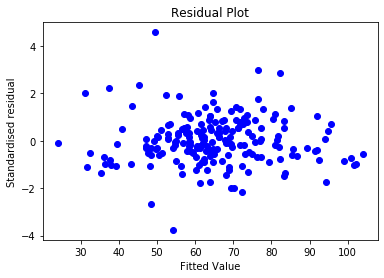

In [22]:
plt.title("Residual Plot")
plt.xlabel('Fitted Value')
plt.ylabel('Standardised residual')
plt.plot(fittedval, std_resid, 'bo')
#m, b = np.polyfit(fittedval, std_resid, 1)
#plt.plot(fittedval, m*fittedval + b)
plt.show()

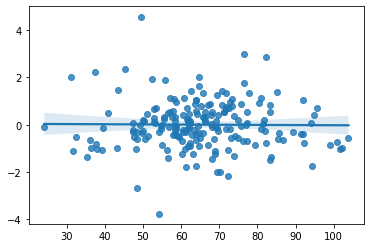

In [23]:
sns.regplot(x=fittedval, y=std_resid, data=data)
plt.show()

In [24]:
lgr = LinearRegression(fit_intercept=False)
features = list(set(data.columns)-set(['CurrentMilk']))
target   = list(['CurrentMilk'])

print(features)
print(target)
x = data.loc[:, features].astype(float)   
y = data.loc[:,target].astype(float)

['Protein', 'I79', 'Fat', 'Previous', 'Days', 'Lactation']
['CurrentMilk']


In [28]:
from sklearn.feature_selection import RFE
rfe=RFE(lgr,n_features_to_select=5)
rfe=rfe.fit(x,y)
print(rfe.ranking_)

[1 1 1 1 2 1]


In [ ]:
sns.lmplot(x="CurrentMilk", y="Previous",hue='I79', data=data)

In [18]:
model = smf.ols('CurrentMilk ~ Previous+Lactation+Protein+Fat+I79', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CurrentMilk   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     73.79
Date:                Thu, 20 May 2021   Prob (F-statistic):           6.34e-43
Time:                        21:41:36   Log-Likelihood:                -752.14
No. Observations:                 199   AIC:                             1516.
Df Residuals:                     193   BIC:                             1536.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8211      7.065      6.628      0.000      32.887      60.755
Previous       0.7389      0.049     15.224      0.000       0.643       0.835
Lactation      0.4244      0.551      0.770      0.442      -0.662       1.511
Protein       -6.6072      1.620     -4.079      0.000      -9.802      -3.413
Fat            1.0143      0.954      1.063      0.289      -0.868       2.897
I79          -14.0589      2.191     -6.416      0.000     -18.380      -9.737
==============================================================================
Omnibus:                       14.833   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.899
Skew:                           0.300   Prob(JB):                     1.18e-07
Kurtosis:                       4.867   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CurrentMilk     23.00
Previous        20.00
Fat              0.95
Protein          0.50
Days           103.50
Lactation        2.00
I79              0.00
dtype: float64


In [30]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
data.shape

(157, 7)